In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
from glob import glob
import io
import re
import pickle
import random

# Import image processing/reading libraries
import cv2
import matplotlib.pyplot as plt
from skimage import transform
import albumentations as A
import seaborn as sns

# Import clustering libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Other libraries
from IPython.display import clear_output

# Dimensionality reduction
from sklearn.decomposition import PCA

# Clustering metrics
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
description=pd.read_csv("../data/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv")
description=pd.concat([description["image"],description["image"],description["image"],description["image"]],axis=0,ignore_index=True)
description=pd.DataFrame(description)

# Conventional data

Modelisation d'un modele de clustering a partir d'algorithmes "conventionnels" (TF-IDF et SIFT)

In [3]:
# Telechargement des features sift et TF-IDF
with open("vectorized_sift.pkl","rb") as f:
    sift_data=pickle.load(f)

data=pd.concat(sift_data)
data.shape

(4200, 2924)

## Kmeans

<AxesSubplot:xlabel='x', ylabel='y'>

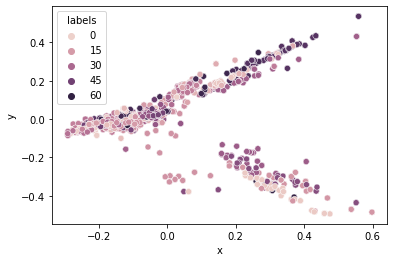

In [4]:
# Classification Kmeans sur des donnees PCA expliquant 90% de la variance
pca = PCA(n_components=0.9)
pca_data=pd.DataFrame(pca.fit_transform(data))
km=KMeans(n_clusters=62)
km.fit(pca_data)
# Nouvelle pca pour la visualisation 2D
pca = PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(pca_data),columns=["x","y"])
pca_data=pd.concat([pca_data,pd.DataFrame(km.labels_,columns=["labels"])],axis=1)
sns.scatterplot(x="x", y="y", data=pca_data, hue="labels")

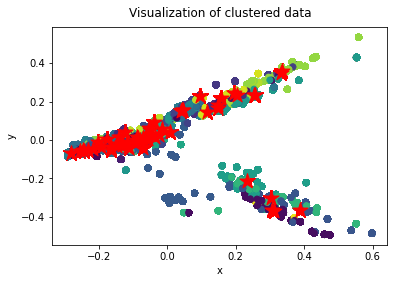

In [5]:
# Visualisation des centroides et des observations clusterisees   
# Run the kmeans algorithm
centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(data,km.labels_)

y_ticks = []
y_lower = y_upper = 0

for i,cluster in enumerate(np.unique(km.labels_)):    
     # scatter plot of data colored with labels
    plt.scatter(pca_data['x'],
        pca_data['y'] , c = km.labels_);
    plt.scatter(centroids[:,0],centroids[:,1],
        marker = '*' , c= 'r',s =250);
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Visualization of clustered data', y=1.02)

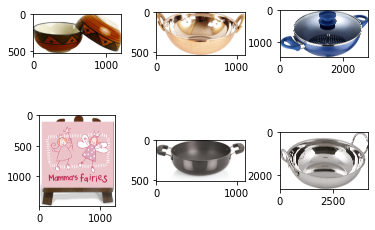

In [6]:
# Selection aleatoire d'images dans un seul cluster
cluster=random.randint(0,61)
subset=description
subset["labels"]=pd.DataFrame(km.labels_)
subset=subset[subset["labels"]==cluster]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.imshow(plt.imread("../data/Dataset+projet+prétraitement+textes+images/Flipkart/Images/"+subset["image"].iloc[i]))

In [7]:
full_labels=[]
full_labels.append(km.labels_)

## Hierarchical clustering

<AxesSubplot:xlabel='x', ylabel='y'>

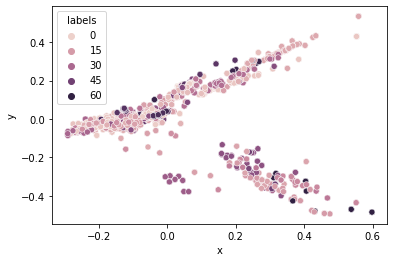

In [8]:
# Classification AgglomerativeClustering sur des donnees PCA expliquant 90% de la variance
pca = PCA(n_components=0.9)
pca_data=pd.DataFrame(pca.fit_transform(data))
ac=AgglomerativeClustering(n_clusters=62)
ac.fit(pca_data)
# Nouvelle pca pour la visualisation 2D
pca = PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(pca_data),columns=["x","y"])
pca_data=pd.concat([pca_data,pd.DataFrame(ac.labels_,columns=["labels"])],axis=1)
sns.scatterplot(x="x", y="y", data=pca_data, hue="labels")

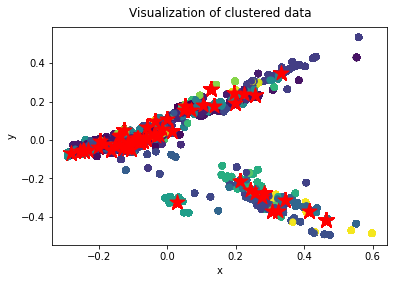

In [9]:
# Calcul des centroides de clusters
centroids=[]
for a in range(0,62):
    subset=pca_data[pca_data["labels"]==a][["x","y"]]
    centroids.append(subset.mean())
    
centroids=pd.DataFrame(centroids)


# Visualisation des centroides et donnees clusterisees
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(ac.labels_)):    
     # scatter plot of data colored with labels
    plt.scatter(pca_data['x'],
        pca_data['y'] , c = ac.labels_);
    plt.scatter(centroids["x"],centroids["y"],
        marker = '*' , c= 'r',s =250);
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Visualization of clustered data', y=1.02)

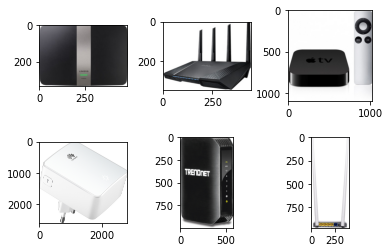

In [10]:
# Selection aleatoire d'images dans un seul cluster
cluster=random.randint(0,61)
subset=description
subset["labels"]=pd.DataFrame(ac.labels_)
subset=subset[subset["labels"]==cluster]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.imshow(plt.imread("../data/Dataset+projet+prétraitement+textes+images/Flipkart/Images/"+subset["image"].iloc[i]))

In [11]:
full_labels.append(ac.labels_)

# Neural networks data

In [3]:
with open("vectorized_cnn.pkl","rb") as f:
    cnn_data=pickle.load(f)
    
data=pd.concat(cnn_data)
data.shape

(4200, 884)

## Kmeans

<AxesSubplot:xlabel='x', ylabel='y'>

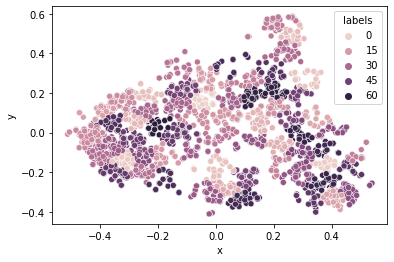

In [4]:
# Classification Kmeans sur des donnees PCA expliquant 90% de la variance
pca = PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(data))
km=KMeans(n_clusters=62)
km.fit(pca_data)
# Nouvelle pca pour la visualisation 2D
pca = PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(pca_data),columns=["x","y"])
pca_data=pd.concat([pca_data,pd.DataFrame(km.labels_,columns=["labels"])],axis=1)
sns.scatterplot(x="x", y="y", data=pca_data, hue="labels")

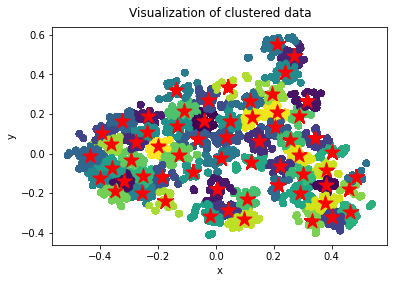

In [6]:
# Recuperation des clusters
centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(data,km.labels_)

y_ticks = []
y_lower = y_upper = 0

# Visualisation des centroides et donnees clusterisees
for i,cluster in enumerate(np.unique(km.labels_)):    
     # scatter plot of data colored with labels
    plt.scatter(pca_data['x'],
        pca_data['y'] , c = km.labels_);
    plt.scatter(centroids[:,0],centroids[:,1],
        marker = '*' , c= 'r',s =250);
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Visualization of clustered data', y=1.02)

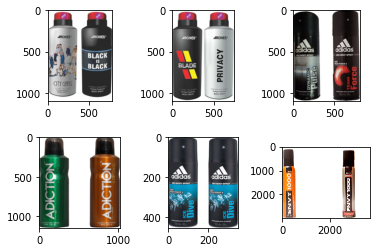

In [15]:
# Selection aleatoire d'images dans un seul cluster
cluster=random.randint(0,61)
subset=description
subset["labels"]=pd.DataFrame(km.labels_)
subset=subset[subset["labels"]==cluster]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.imshow(plt.imread("../data/Dataset+projet+prétraitement+textes+images/Flipkart/Images/"+subset["image"].iloc[i]))

In [16]:
full_labels.append(km.labels_)

## Hierarchical clustering

<AxesSubplot:xlabel='x', ylabel='y'>

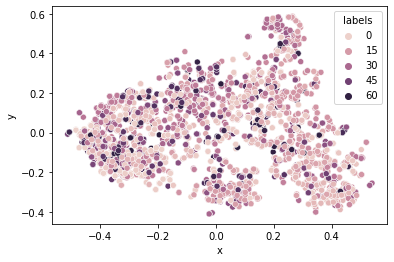

In [7]:
# Classification AgglomerativeClustering sur des donnees PCA expliquant 90% de la variance
pca = PCA(n_components=0.9)
pca_data=pd.DataFrame(pca.fit_transform(data))
ac=AgglomerativeClustering(n_clusters=62)
ac.fit(pca_data)
# Nouvelle pca pour la visualisation 2D
pca = PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(pca_data),columns=["x","y"])
pca_data=pd.concat([pca_data,pd.DataFrame(ac.labels_,columns=["labels"])],axis=1)
sns.scatterplot(x="x", y="y", data=pca_data, hue="labels")

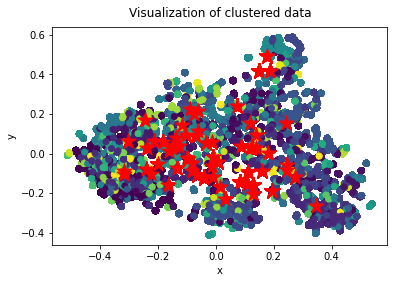

In [8]:
# Calcul des centroides
for a in range(0,62):
    subset=pca_data[pca_data["labels"]==a][["x","y"]]
    centroids.append(subset.mean())
    
centroids=pd.DataFrame(centroids)


# Visualisation des centroides et donnees clusterisees
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(ac.labels_)):    
     # scatter plot of data colored with labels
    plt.scatter(pca_data['x'],
        pca_data['y'] , c = ac.labels_);
    plt.scatter(centroids["x"],centroids["y"],
        marker = '*' , c= 'r',s =250);
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Visualization of clustered data', y=1.02)

## Visualisation alternative : UMAP 

In [18]:
import umap
import umap.plot
mapper = umap.UMAP().fit(data)
p = umap.plot.interactive(mapper, labels=ac.labels_, point_size=4)
umap.plot.show(p)

In [ ]:
cluster=random.randint(0,61)
subset=description
subset["labels"]=pd.DataFrame(ac.labels_)
subset=subset[subset["labels"]==cluster]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.imshow(plt.imread("../data/Dataset+projet+prétraitement+textes+images/Flipkart/Images/"+subset["image"].iloc[i]))

In [ ]:
full_labels.append(ac.labels_)

## Comparaison de clustering

In [ ]:
from sklearn.metrics import adjusted_rand_score as ari
scores=[]
for a in range(0,len(full_labels)):
    temp=[]
    for b in range(0,len(full_labels)):
        temp.append(ari(full_labels[a],full_labels[b]))
        
    scores.append(temp)

In [ ]:
scores

In [ ]:
ari(full_labels[2],full_labels[3])